In [2]:
# You might need to install the following
# pip install cartopy ipympl

In [3]:
import xarray as xr
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
# Open the .nc file
ds = xr.open_dataset('South_America_TAVG_Gridded_1.nc')

In [5]:
# Filter for 2021 and for month 0 (January)
plot_data = ds.sel(time=slice('2021', '2022')).isel(month_number=0)

# Convert plot_data (xarray object) to pandas dataframe
df = plot_data.to_dataframe().reset_index()

In [6]:
df.head()

,longitude,latitude,time,land_mask,areal_weight,temperature,climatology
0,-81.5,-55.5,2021.041667,0.0,0.566428,-0.106733,6.108946
1,-81.5,-55.5,2021.125000,0.0,0.566428,-0.328642,6.108946
2,-81.5,-55.5,2021.208333,0.0,0.566428,0.229496,6.108946
3,-81.5,-55.5,2021.291667,0.0,0.566428,0.447243,6.108946
4,-81.5,-55.5,2021.375000,0.0,0.566428,0.704618,6.108946


In [7]:
# Create grid data
# This will create an interploated 2D grid of lon, lat, and temperature with 10,000 points!
lon = np.array(df['longitude'])
lat = np.array(df['latitude'])
temp = np.array(df['temperature'])

grid_lon, grid_lat = np.meshgrid(np.linspace(lon.min(), lon.max(), 100), np.linspace(lat.min(), lat.max(), 100))

grid_temp = griddata((lon, lat), temp, (grid_lon, grid_lat), method='cubic')

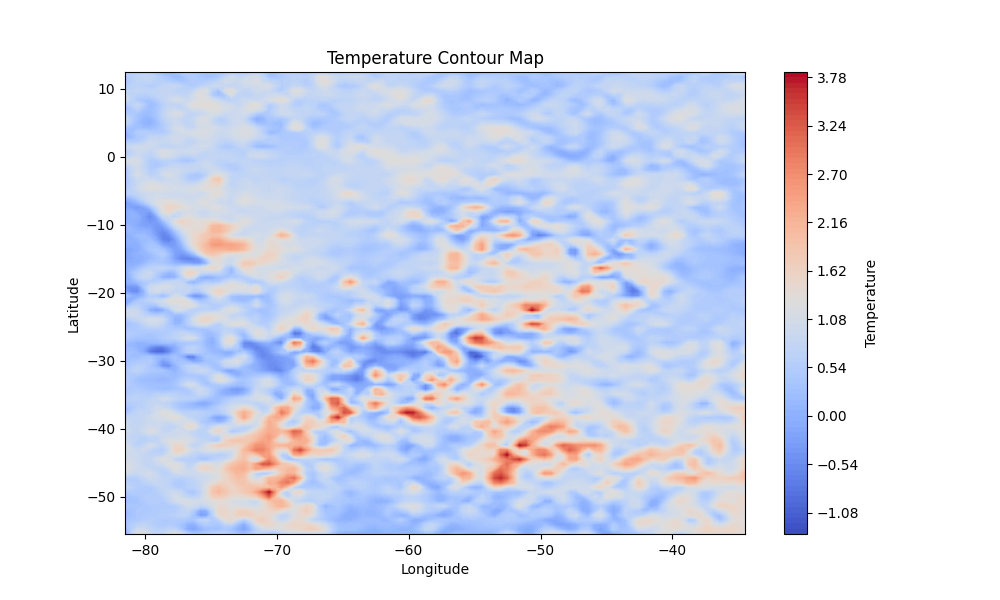

In [8]:
# Now, plot the contour map
%matplotlib widget
plt.figure(figsize=(10, 6))
plt.contourf(grid_lon, grid_lat, grid_temp, levels=100, cmap='coolwarm')
plt.colorbar(label='Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Temperature Contour Map')
plt.show()

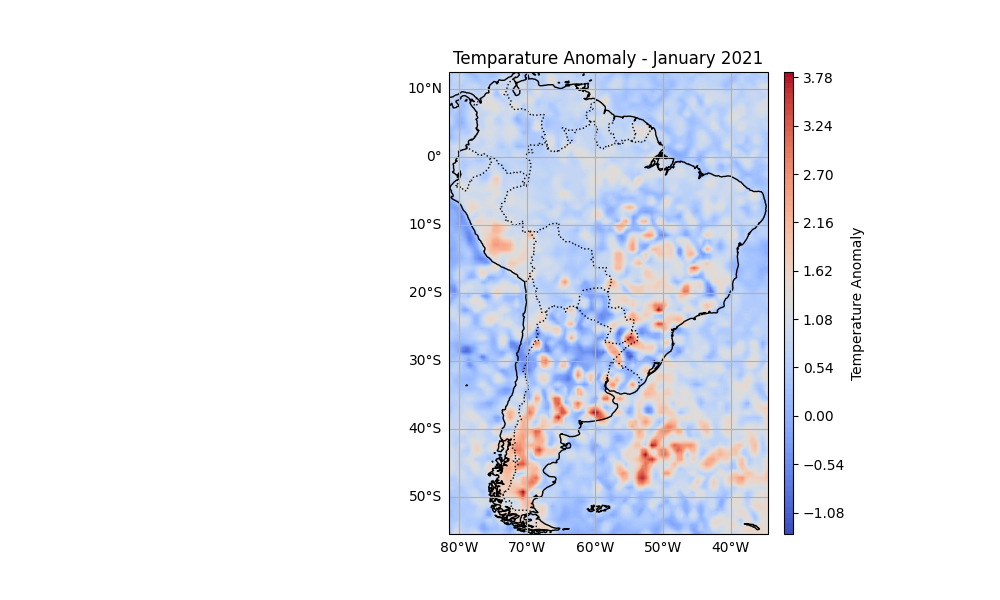

In [9]:
# Enable the inline backend for interactive plots
%matplotlib widget

# Create a figure with an axes object using a PlateCarree projection
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add natural earth features to the axes
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the contour map with longitude and latitude on the world map
contour = ax.contourf(grid_lon, grid_lat, grid_temp, levels=100, cmap='coolwarm', transform=ccrs.PlateCarree())

# Add a color bar
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.02, aspect=50)
cbar.set_label('Temperature Anomaly')

# Set labels for x and y axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set the title
ax.set_title('Temparature Anomaly - January 2021')

# Add gridlines and labels, disable y-axis labels on the right
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.right_labels = False  # Do not display the y-axis labels on the right
gl.top_labels = False  # Optionally, you can also turn off the top x-axis labels if desired

# Show the plot
plt.show()